DETERMINISTIC ENVIRONMENT

In [115]:
! pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt
from google.colab import widgets
import time

In [117]:
grid = np.zeros((5, 5))
print(grid)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [118]:
pos1 = [0, 0]
pos2 = [4, 1]

In [119]:
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.8

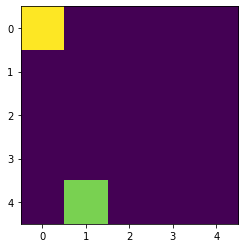

In [120]:
#plt.grid(ls="dashed", lw=1, c="r")
plt.imshow(grid)

In [121]:
#q_table = np.zeros([env1.observation_space.n, env1.action_space.n])

In [122]:
from numpy.lib.function_base import kaiser
state_table = dict()
k = 0
for i in range(5):
  for j in range(5):
    state_table[(i,j)] = k
    k += 1

In [284]:
class GridEnvironment1(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(8)
        self.timestep = 0
        self.agent_pos = (0, 0)
        self.goal_pos = (4, 1)
        self.max_timesteps=20000
        self.timesteps = 0
        self.q_values = np.zeros((25,8))
        self.reward=0
        self.g=0
        self.h=0
        self.i=0
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        p=round(random.random(),1)
        x=self.agent_pos[0]
        y=self.agent_pos[1]
        if action == 0:
            self.agent_pos=(x-1,y)
        if action == 1:
          self.agent_pos=(x+1,y)
        if action == 2:
          self.agent_pos=(x,y+1)
        if action == 3:
          self.agent_pos=(x,y-1)
        if action == 4:
          self.agent_pos=(x-1,y+1)
        if action == 5:
          self.agent_pos=(x+1,y+1)
        if action == 6:
          self.agent_pos=(x+1,y-1)
        if action == 7:
          self.agent_pos=(x-1,y-1)
      
        if(self.agent_pos[0]<0 or self.agent_pos[0]>4 or self.agent_pos[1]<0 or self.agent_pos[1]>4):
           self.agent_pos=(x,y)
        reward=0
      
        if (self.agent_pos == self.goal_pos):
            reward = 10

        elif (self.agent_pos == (2,3)and self.g!=2):
            reward = 1
            self.g=self.g+2
       
        elif (self.agent_pos == (3,3)and self.h!=2):
              reward = 2
              self.h=self.h+2

              
        elif (self.agent_pos == (1,1) and self.i!=2):
            reward = 5
            self.i=self.i+2

        self.timesteps += 1
        done = True if (((self.agent_pos[0] == self.goal_pos[0]) and (self.agent_pos[1] == self.goal_pos[1])) or (self.timesteps == self.max_timesteps)) else False
        return state_table[self.agent_pos], reward, done 



    
    def render(self):
        plt.imshow(self.state)


In [281]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.q_values = env.q_values
  def step(self, state,epsilon):
      return np.random.choice(self.action_space.n)  
      if random.uniform(0, 1) < epsilon:
            return  np.random.randint(0,8)# Explore action space
            
      else:
            return max(self.q_values[state])



Q-LEARNING

In [ ]:
%%time
from IPython.display import clear_output

done=False

alpha = 0.3
gamma = 0.9
epsilon = 0.99
epsilon_dk=[]
#aa=[i for i in range(8)]
z = []
k = []
c=0
env1=GridEnvironment1()
agent = RandomAgent(env1)
for i in range(1, 1000):
    state=0

    epochs, reward= 0, 0
    c=c+reward
    z.append(c)
    done = False
    d=0
    
    
    while not done:
        next_action= agent.step(state,epsilon)
        next_pos,reward,done = env1.step(next_action)
        q_next=np.max(np.zeros([8])) if done else max(env1.q_values[next_pos])
        Q_table=reward+gamma*q_next-env1.q_values[state,next_action]
        env1.q_values[state,next_action] += alpha*Q_table
        if done:
          epsilon=epsilon*0.99
          epsilon_dk.append(epsilon)
        c=c+reward
        d=d+reward
        z.append(c)
        k.append(d)
        state = next_pos

    plt.plot(k)
print(c)
print("Training finished.\n")



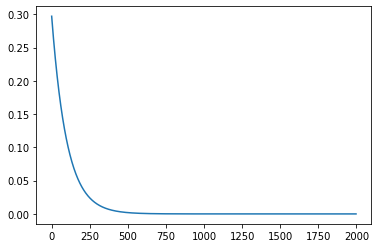

In [242]:
plt.plot(epsilon_dk)

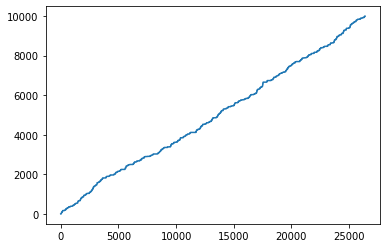

In [285]:
plt.plot(z)

In [128]:
%%time
from IPython.display import clear_output

done=False

alpha = 0.99
gamma = 0.1
epsilon = 0
#aa=[i for i in range(8)]
z = []
c=0
env1=GridEnvironment1()
agent_pos=(1,3)
for i in range(0,1):
    state=0

    epochs, reward= 0, 0
    c=c+reward
    z.append(c)
    done = False

    while not done:
      next_action= agent.step(state,0)
      next_pos,reward,done = env1.step(next_action)
      c=c+reward
      z.append(c)
      state = next_pos


print("reward",c)
print("Training finished.\n")

reward 18
Training finished.

CPU times: user 15 ms, sys: 6.14 ms, total: 21.2 ms
Wall time: 19.3 ms


SARSA

19998
Training finished.

CPU times: user 1.93 s, sys: 158 ms, total: 2.09 s
Wall time: 1.93 s


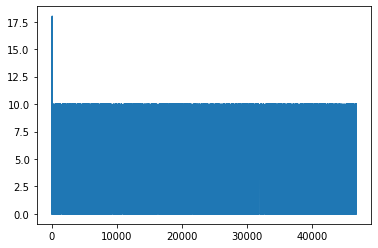

In [201]:
%%time
from IPython.display import clear_output

done=False

alpha = 0.3
gamma = 0.9
epsilon = 0.99
epsilon_dk1=[]
#aa=[i for i in range(8)]
p1 = []
k1 = []
c1=0
env2=GridEnvironment1()
agent2 = RandomAgent(env2)
for i in range(1, 2000):
    state=0

    epochs, reward= 0, 0

    done = False
    d1=0
    action= agent2.step(state,epsilon)
    #action = 
    
    while not done:
        next_action= agent2.step(state,epsilon)
        next_pos,reward,done = env2.step(action)
        #print(env1.q_values[state,next_action])
        #print(reward)
        q_next= 0 if done else env2.q_values[next_pos][next_action]
        Q_table=reward+gamma*q_next-env2.q_values[state,next_action]
        env2.q_values[state,action] += gamma*Q_table 
        if done:
          epsilon=epsilon*0.99
          epsilon_dk1.append(epsilon)

        c1=c1+reward
        d1=d1+reward
        p1.append(c1)
        k1.append(d1)
        state = next_pos
        action = next_action

plt.plot(k1)
print(c1)
print("Training finished.\n")



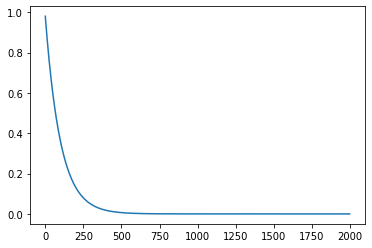

In [184]:
plt.plot(epsilon_dk1)

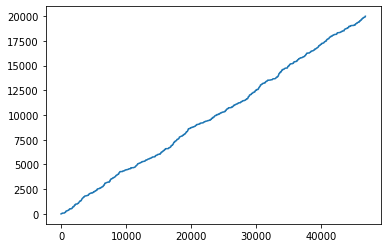

In [205]:
plt.plot(p1)

In [186]:
%%time
from IPython.display import clear_output

done=False

alpha = 0.99
gamma = 0.1
epsilon = 0
#aa=[i for i in range(8)]
z1 = []
c1=0
env2=GridEnvironment1()
agent2 = RandomAgent(env2)
agent2_pos=(0,0)
for i in range(0,1):
    state=0

    epochs, reward= 0, 0
    c=c+reward
    z.append(c)
    done = False

    while not done:
      next_action= agent2.step(state,0)
      next_pos,reward,done = env2.step(next_action)
      c1=c1+reward
      z1.append(c1)
      state = next_pos
print("reward",c1)

print("Training finished.\n")


reward 18
Training finished.

CPU times: user 9.44 ms, sys: 2.01 ms, total: 11.4 ms
Wall time: 13.4 ms


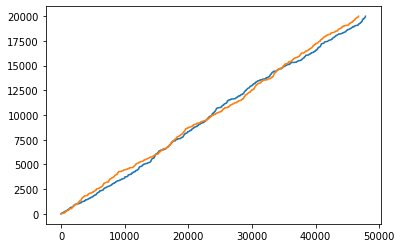

In [203]:
plt.plot(z, label="Q-Learning Algorithm, deterministic")
plt.plot(p1, label="SARSA Algorithm, deterministic")
plt.show()

STOCHASTIC ENVIRONMENT

In [134]:

import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt
from google.colab import widgets
import time

In [135]:
grid1 = np.zeros((5, 5))
print(grid1)


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [136]:
pos1 = [0, 0]
pos2 = [4, 1]

In [137]:
grid1[tuple(pos1)] = 1
grid1[tuple(pos2)] = 0.8

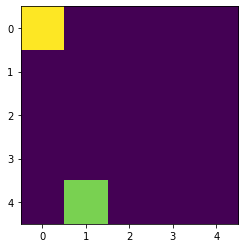

In [138]:
plt.imshow(grid1)

In [139]:
from numpy.lib.function_base import kaiser
state_table = dict()
k = 0
for i in range(5):
  for j in range(5):
    state_table[(i,j)] = k
    k += 1

In [140]:
class GridEnvironment2(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(8)
        self.timestep = 0
        self.agent_pos = (0, 0)
        self.goal_pos = (4, 1)
        self.max_timesteps=200000
        self.timesteps = 0
        self.q_values = np.zeros((25,8))
        self.reward=0
        self.g=0
        self.h=0
        self.i=0
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        p=round(random.random(),1)
        x=self.agent_pos[0]
        y=self.agent_pos[1]

        if p>0.9:
            self.agent_pos=(x+1,y)
        else:
            self.agent_pos=(x-1,y)

        if action == 1:
          self.agent_pos=(x+1,y)
        if action == 2:
          self.agent_pos=(x,y+1)
        if action == 3:
          self.agent_pos=(x,y-1)
        if action == 4:
          self.agent_pos=(x-1,y+1)
        if action == 5:
          self.agent_pos=(x+1,y+1)
        if action == 6:
          self.agent_pos=(x+1,y-1)
        if action == 7:
          self.agent_pos=(x-1,y-1)
      
        if(self.agent_pos[0]<0 or self.agent_pos[0]>4 or self.agent_pos[1]<0 or self.agent_pos[1]>4):
           self.agent_pos=(x,y)
        reward=0
      
        if (self.agent_pos == self.goal_pos):
            reward = 10

        elif (self.agent_pos == (2,3)and self.g!=2):
            reward = 1
            self.g=self.g+2
       
        elif (self.agent_pos == (3,3)and self.h!=2):
              reward = 2
              self.h=self.h+2

              
        elif (self.agent_pos == (1,1) and self.i!=2):
            reward = 5
            self.i=self.i+2

        self.timesteps += 1
        done = True if (((self.agent_pos[0] == self.goal_pos[0]) and (self.agent_pos[1] == self.goal_pos[1])) or (self.timesteps == self.max_timesteps)) else False
        return state_table[self.agent_pos], reward, done 



    
    def render(self):
        plt.imshow(self.state)


In [141]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.q_values = env.q_values
  def step(self, state,epsilon):
      return np.random.choice(self.action_space.n)  
      if random.uniform(0, 1) < epsilon:
            return  np.random.randint(0,8)# Explore action space
            
      else:
            return max(self.q_values[state])

Q LEARNING STOCHASTIC

19998
Training finished.

CPU times: user 2.25 s, sys: 186 ms, total: 2.43 s
Wall time: 2.27 s


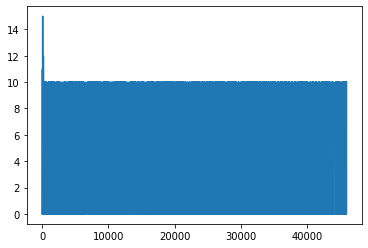

In [142]:
%%time
from IPython.display import clear_output

done=False

alpha = 0.3
gamma = 0.9
epsilon = 0.99
epsilon_dk_s=[]
#aa=[i for i in range(8)]
m = []
n=[]
p=0
env1=GridEnvironment2()
agent1 = RandomAgent(env1)
for i in range(1, 2000):
    state=0

    epochs, reward= 0, 0
    c=c+reward
    z.append(c)
    done = False
    #action= np.random.randint(0,8)
    #action = 
    q=0
    while not done:
        next_action= agent1.step(state,epsilon)
        next_pos,reward,done = env1.step(next_action)
        q_next=np.max(np.zeros([8])) if done else max(env1.q_values[next_pos])
        Q_table=reward+gamma*q_next-env1.q_values[state,next_action]
        env1.q_values[state,next_action] += alpha*Q_table
        if done:
          epsilon=epsilon*0.99
          epsilon_dk_s.append(epsilon)
        p=p+reward
        q=q+reward
        m.append(p)
        n.append(q)
        state = next_pos
plt.plot(n)
print(p)
print("Training finished.\n")



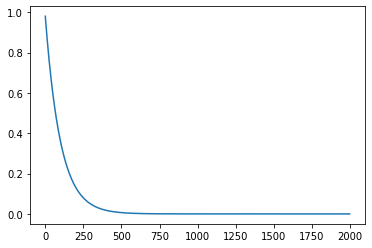

In [143]:
plt.plot(epsilon_dk_s)

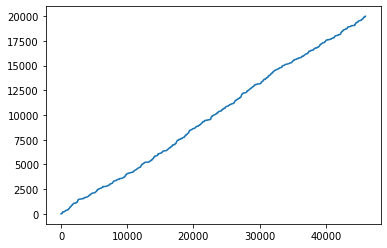

In [144]:
plt.plot(m)

In [232]:
%%time
from IPython.display import clear_output

done=False
alpha = 0.99
gamma = 0.1
epsilon = 0
z = []
c=0
env1=GridEnvironment2()
agent_pos=(1,3)
for i in range(0,1):
    state=0
    epochs, reward= 0, 0
    c=c+reward
    z.append(c)
    done = False
    d=0

    while not done:
      next_action= agent.step(state,0)
      next_pos,reward,done = env1.step(next_action)
      c=c+reward
      d=d+reward
      z.append(c)
      state = next_pos
print("reward",c)
print("Training finished.\n")

reward 15
Training finished.

CPU times: user 1.17 ms, sys: 0 ns, total: 1.17 ms
Wall time: 1.18 ms


SARSA STOCHASTIC

19998
Training finished.

CPU times: user 2.89 s, sys: 184 ms, total: 3.07 s
Wall time: 3.82 s


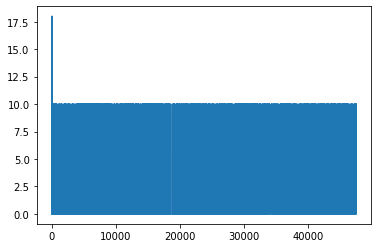

In [146]:
%%time
from IPython.display import clear_output

done=False

alpha = 0.3
gamma = 0.9
epsilon = 0.99
epsilon_dk1=[]
#aa=[i for i in range(8)]
z1 = []
k1 = []
c1=0
env2=GridEnvironment2()
agent2 = RandomAgent(env2)
for i in range(1, 2000):
    state=0

    epochs, reward= 0, 0
    c=c+reward
    z.append(c)
    done = False
    d1=0
    action= agent2.step(state,epsilon)
    #action = 
    
    while not done:
        next_action= agent2.step(state,epsilon)
        next_pos,reward,done = env2.step(action)
        #print(env1.q_values[state,next_action])
        #print(reward)
        q_next= 0 if done else env2.q_values[next_pos][next_action]
        Q_table=reward+gamma*q_next-env2.q_values[state,next_action]
        env2.q_values[state,action] += gamma*Q_table
        if done:
          epsilon=epsilon*0.99
          epsilon_dk1.append(epsilon)

        c1=c1+reward
        d1=d1+reward
        z1.append(c1)
        k1.append(d1)
        state = next_pos
        action= next_action
plt.plot(k1)
print(c1)
print("Training finished.\n")



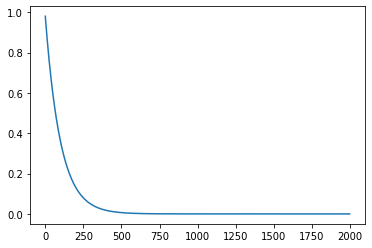

In [147]:
plt.plot(epsilon_dk1)

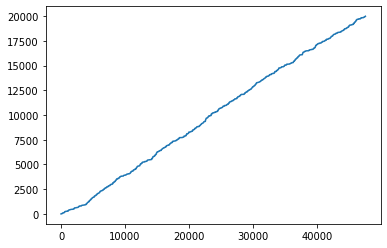

In [148]:
plt.plot(z1)

In [206]:
%%time
from IPython.display import clear_output

done=False

alpha = 0.99
gamma = 0.1
epsilon = 0
#aa=[i for i in range(8)]
z = []
c=0
env2=GridEnvironment2()
agent2_pos=(1,3)
for i in range(0,1):
    state=0

    epochs, reward= 0, 0
    c=c+reward
    z.append(c)
    done = False

    while not done:
      next_action= agent2.step(state,0)
      next_pos,reward,done = env2.step(next_action)
      print(next_action)
      c=c+reward
      z.append(c)
      state = next_pos
      action = next_action


print("reward",c)
print("Training finished.\n")

1
0
5
1
4
6
1
4
2
3
3
7
2
6
4
7
0
0
5
7
7
6
5
7
1
2
5
7
7
2
3
2
0
3
2
4
1
7
7
2
1
0
2
3
6
7
0
4
5
3
2
5
0
2
1
4
7
0
4
4
2
2
0
5
2
1
0
0
4
0
5
0
2
2
7
0
6
2
3
4
6
1
1
3
4
7
5
5
3
5
3
7
3
0
1
3
6
2
4
0
0
3
7
1
0
3
5
6
4
6
6
0
2
6
0
1
6
1
6
4
2
3
6
4
1
1
reward 18
Training finished.

CPU times: user 28.3 ms, sys: 1.99 ms, total: 30.3 ms
Wall time: 33 ms


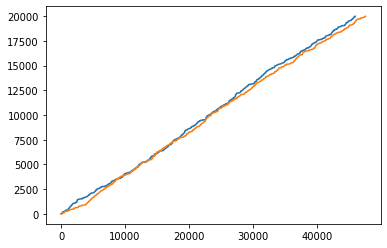

In [150]:
plt.plot(m, label="Q-Learning Algorithm, stochastic")
plt.plot(z1, label="SARSA Algorithm, stochastic")
plt.show()